In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('StressLevelDataset.csv',dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int32
 1   self_esteem                   1100 non-null   int32
 2   mental_health_history         1100 non-null   int32
 3   depression                    1100 non-null   int32
 4   headache                      1100 non-null   int32
 5   blood_pressure                1100 non-null   int32
 6   sleep_quality                 1100 non-null   int32
 7   breathing_problem             1100 non-null   int32
 8   noise_level                   1100 non-null   int32
 9   living_conditions             1100 non-null   int32
 10  safety                        1100 non-null   int32
 11  basic_needs                   1100 non-null   int32
 12  academic_performance          1100 non-null   int32
 13  study_load                    110

In [18]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [28]:
# df.drop(['noise_level','social_support','basic_needs','safety','self_esteem','blood_pressure','living_conditions'],inplace=True,axis=1)

#### plt.figure(figsize=(28,28))
sns.heatmap(data=df.corr(),annot=True)

In [14]:
# df.drop(['blood_pressure','living_conditions'],inplace=True,axis=1)

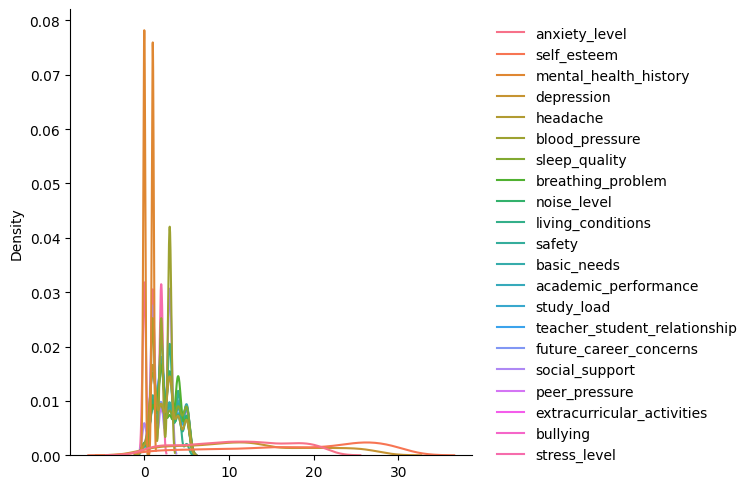

In [591]:
sns.displot(df,kind='kde')

In [19]:
df = df[['academic_performance','study_load','stress_level',
         # 'anxiety_level', 
         # 'depression',
         'teacher_student_relationship','future_career_concerns','headache','sleep_quality','breathing_problem']]
df.columns

Index(['academic_performance', 'study_load', 'stress_level',
       'teacher_student_relationship', 'future_career_concerns', 'headache',
       'sleep_quality', 'breathing_problem'],
      dtype='object')

In [20]:
# df['academic_performance'] = df['academic_performance'].astype(int)
# df['study_load'] = df['study_load'].astype(int)
# df['safety'] = df['safety'].astype(int)
# df['peer_pressure'] = df['peer_pressure'].astype(int)
# df['teacher_student_relationship'] = df['teacher_student_relationship'].astype(int)
# df['headache'] = df['headache'].astype(int)
# df['blood_pressure'] = df['blood_pressure'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   academic_performance          1100 non-null   int32
 1   study_load                    1100 non-null   int32
 2   stress_level                  1100 non-null   int32
 3   teacher_student_relationship  1100 non-null   int32
 4   future_career_concerns        1100 non-null   int32
 5   headache                      1100 non-null   int32
 6   sleep_quality                 1100 non-null   int32
 7   breathing_problem             1100 non-null   int32
dtypes: int32(8)
memory usage: 34.5 KB


In [21]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(list(df['study_load']))
print(sample_outliers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [22]:
df['study_load'].replace({0:df['study_load'].mean(),5:df['study_load'].mean()},inplace=True)
df['study_load']

C:\Users\Krish\AppData\Local\Temp\ipykernel_7028\2622634088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['study_load'].replace({0:df['study_load'].mean(),5:df['study_load'].mean()},inplace=True)


0       2.000000
1       4.000000
2       3.000000
3       4.000000
4       3.000000
          ...   
1095    2.000000
1096    1.000000
1097    1.000000
1098    2.621818
1099    4.000000
Name: study_load, Length: 1100, dtype: float64

In [598]:
# sample_outliers = detect_outliers_iqr(list(df['headache']))
# sample_outliers
# df['headache'].replace({0:df['headache'].mean(),5:df['headache'].mean()},inplace=True)
# df['headache'].astype(int)


In [599]:
# sample_outliers = detect_outliers_iqr(list(df['blood_pressure']))
# sample_outliers
# df['blood_pressure'].replace({0:1,5:4},inplace=True)
# df['blood_pressure'].astype(int)

In [600]:

# sample_outliers = detect_outliers_iqr(list(df['teacher_student_relationship']))
# sample_outliers
# df['teacher_student_relationship'].replace({0:df['teacher_student_relationship'].mean(),5:df['teacher_student_relationship'].mean()},inplace=True)
# df['teacher_student_relationship'].astype(int)

In [569]:
# df['headache'] = np.log(df['headache'])
# df['teacher_student_relationship'] = np.log(df['teacher_student_relationship'])

In [522]:
# df['blood_pressure'] = np.log(df['blood_pressure'])

In [1]:
# df['academic_performance'] = np.log(df['academic_performance'])
# df['academic_performance'].astype(int)

In [23]:
# df['academic_performance'] = df['academic_performance'].astype(int)
# df['study_load'] = df['study_load'].astype(int)
# df['teacher_student_relationship'] = df['teacher_student_relationship'].astype(int)
# df['headache'] = df['headache'].astype(int)
# df['blood_pressure'] = df['blood_pressure'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   academic_performance          1100 non-null   int32  
 1   study_load                    1100 non-null   float64
 2   stress_level                  1100 non-null   int32  
 3   teacher_student_relationship  1100 non-null   int32  
 4   future_career_concerns        1100 non-null   int32  
 5   headache                      1100 non-null   int32  
 6   sleep_quality                 1100 non-null   int32  
 7   breathing_problem             1100 non-null   int32  
dtypes: float64(1), int32(7)
memory usage: 38.8 KB


<Axes: >

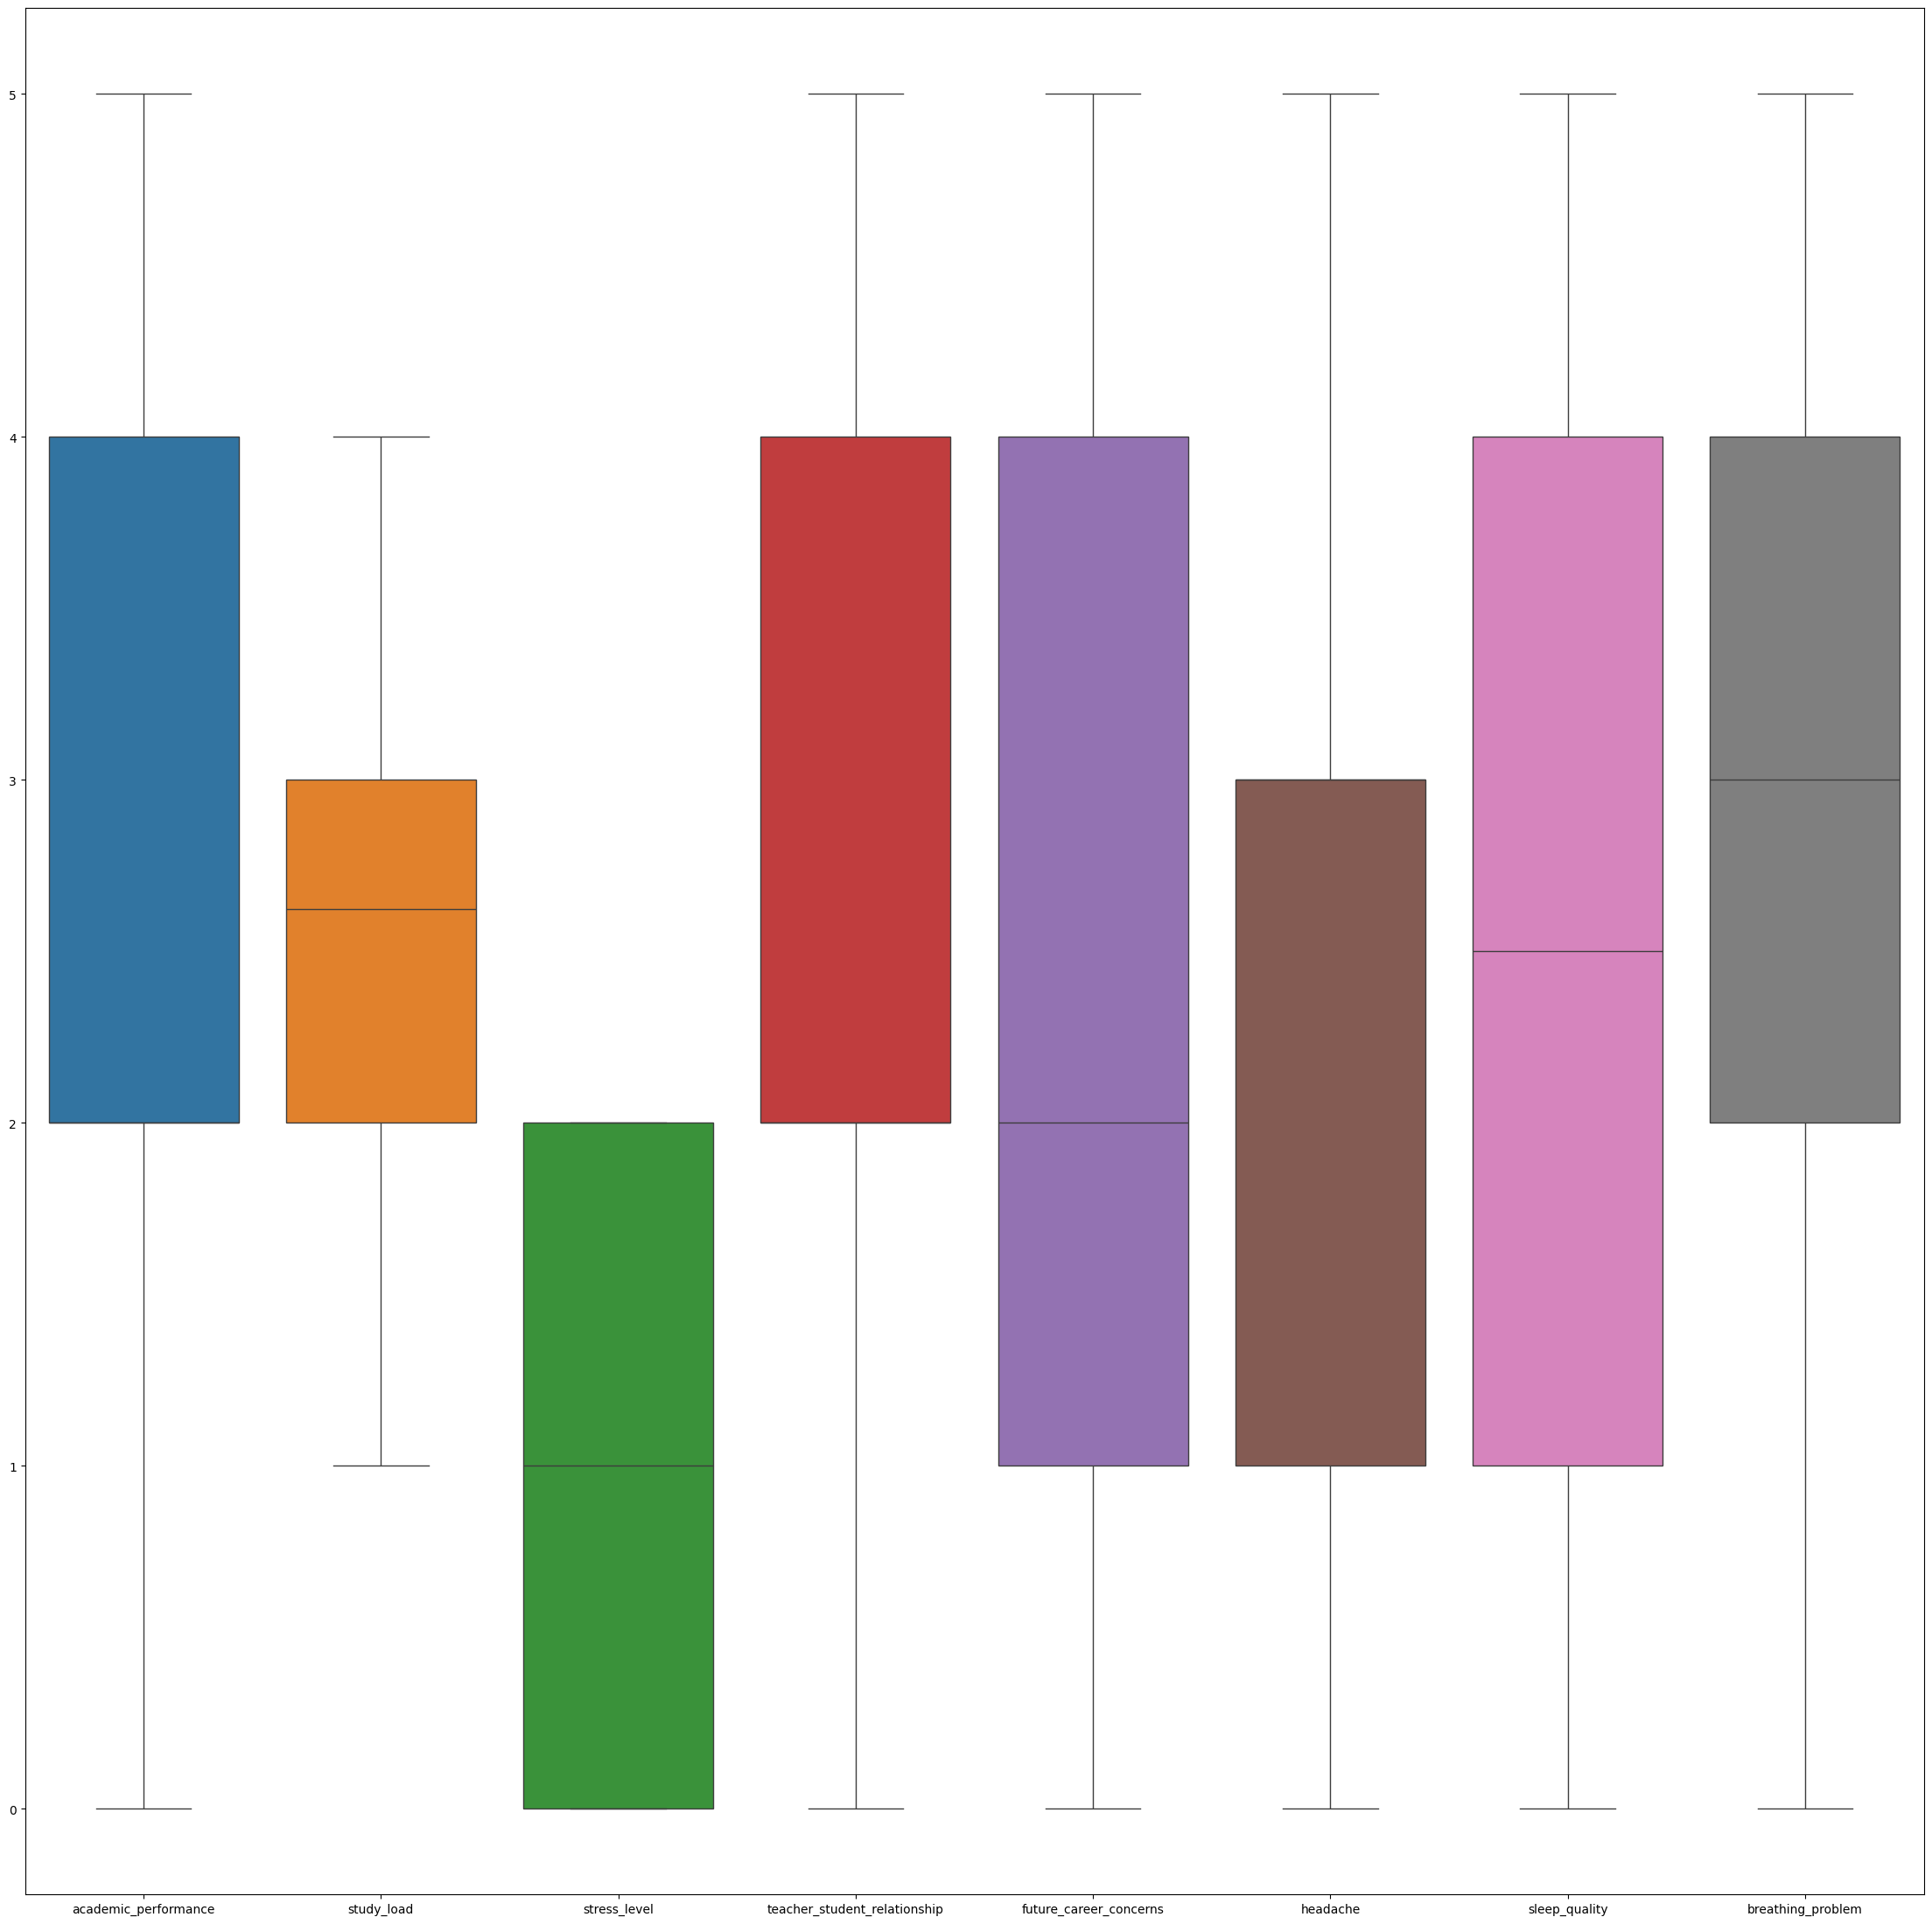

In [9]:
plt.figure(figsize=(28,28))
sns.boxplot(df)

In [24]:


x = df.drop(['stress_level'],axis=1)
x = pd.get_dummies(x)
y = df['stress_level']


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [27]:
logmodel = LogisticRegression(max_iter=2000)

In [28]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [29]:
predictions = logmodel.predict(x_test) #Testing
print(predictions)

[2 2 2 0 1 1 0 1 2 1 1 1 0 2 1 1 1 0 0 2 1 0 1 2 2 0 1 2 1 2 1 0 0 2 2 1 1
 0 1 2 0 2 1 1 1 2 0 0 2 1 1 0 2 2 2 0 0 0 1 2 0 2 1 2 1 0 0 2 2 2 1 0 2 2
 1 1 0 1 2 1 0 2 1 0 2 2 2 1 0 1 0 1 2 2 1 2 2 1 2 1 0 0 0 0 0 0 0 1 1 0 2
 0 0 0 0 0 2 1 0 2 1 1 0 1 0 1 0 2 2 0 0 2 1 2 1 1 1 1 1 0 0 1 2 0 2 1 0 1
 1 1 2 2 2 2 0 0 2 1 1 1 2 0 2 0 1 0 2 2 0 0 0 1 2 1 1 0 1 0 2 1 2 0 1 2 0
 1 0 0 2 1 2 1 2 2 2 1 2 0 0 2 0 0 2 2 1 1 0 0 0 1 2 1 1 2 1 0 2 1 0 2 1 1
 1 0 2 1 2 1 0 0 1 0 1 2 2 2 0 1 0 2 1 0 2 0 1 1 0 1 1 2 2 2 1 2 1 1 0 2 1
 1 2 0 0 0 1 0 0 2 1 1 0 1 2 1 0 1 0 2 0 2 1 2 1 2 2 1 1 2 2 0 0 2 0 0 2 0
 1 1 2 0 2 0 0 0 2 2 2 0 2 1 1 1 0 0 2 0 0 0 0 1 1 0 1 1 1 0 1 2 0 1]


In [ ]:
print('Enter your study load (1-4): ')
print('high load (4) : 3-4 assignment per week,studying 2-3 hours per day,')
print('mormal load (2) : 1-2 assignment per week,studying 2-3 hours per day,')
study_load = int(input())

print("Enter your academic_performance (1-5) : ")
print('Level 1: Very Poor : mostly D and F')
print('Average 3: mostly B and some C')
print('Excellent 5: mostly A')
academic_performance = int(input())

print("Enter your relationship with teacher (1-5): ")
print('very poor (1): Minimal to no positive interactions. The teacher and student rarely communicate outside of necessary classroom activities.')
print('Average 3 : Neutral interactions. Communication is functional but lacks warmth or personal connection.')
print('Excellent 5 : Highly positive interactions. The teacher and student have a strong rapport and communicate openly.')
teacher_student_relationship = int(input())

print("Enter your future career concerns (1-5): ")
print('Very Low Concern (1): The student has a very clear idea of their future career path and is confident in achieving it')
print('Moderate Concern 3 : The student has some idea of potential career paths but lacks a clear direction.')
print('Very High Concern 5 : The student has no clear idea about their future career path and feels completely lost')
future_career_concerns = int(input())

print("Enter your sleep quality (1-5): ")
print('Very Poor (1): Frequently sleeps less than 4 hours per night.')
print('Average 3 : Generally sleeps 6-7 hours per night')
print('Excellent 5 : Consistently sleeps 8 or more hours per night')
sleep_quality = int(input())

print("Enter your breathing problem (0-5): ")
print('None 0: No breathing problems at any time.')
print('Mild 2 : Occasional breathing problems, such as mild shortness of breath during heavy exercise')
print('Excellent 4 : Frequent breathing problems, including shortness of breath with minimal physical activity')
print('Very Severe 5 : Constant or nearly constant breathing problems, with shortness of breath even at rest')
breathing_problem = int(input())


print("Enter your headaches problem (0-5): ")
print('No Headache 0: No headaches at any time.')
print('Mild 2 : Mild headaches occurring once or twice a month')
print('Excellent 4 : Severe headaches occurring weekly or more frequently')
print('Very Severe 5 : Very severe headaches occurring several times a week or daily')
headache = int(input())

Enter your study load (1-4): 
high load (4) : 3-4 assignment per week,studying 2-3 hours per day,
mormal load (2) : 1-2 assignment per week,studying 2-3 hours per day,


In [30]:
x_train.columns

Index(['academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'headache', 'sleep_quality',
       'breathing_problem'],
      dtype='object')

In [31]:
data = np.array([academic_performance,study_load,teacher_student_relationship,future_career_concerns,headache,sleep_quality,breathing_problem]).reshape(1,-1)
data
prediction = logmodel.predict(data)
print('your Anxiety level is : ',prediction)

NameError: name 'academic_performance' is not defined

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       122
           1       0.82      0.92      0.87       103
           2       0.90      0.90      0.90       105

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8878787878787879

In [50]:
df.columns

Index(['academic_performance', 'study_load', 'stress_level',
       'teacher_student_relationship', 'future_career_concerns', 'headache',
       'sleep_quality', 'breathing_problem'],
      dtype='object')

In [22]:
df['stress_level'].unique()

array([1, 2, 0])

In [36]:
import joblib
import pickle
with open('model2.pkl', 'wb') as f:
    pickle.dump(logmodel, f)